# **PROBLEM STATEMENT**

 Binary Classification of rice type  based on the given data

# **Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score,precision_score,ConfusionMatrixDisplay,classification_report

# **Loading** **Dataset**

In [ ]:
df=pd.read_csv('/content/riceClassification.csv')

**Reading** **Dataset**

In [ ]:
df.head()

id  Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0   1  4537        92.229316        64.012769      0.719916        4677   
1   2  2872        74.691881        51.400454      0.725553        3015   
2   3  3048        76.293164        52.043491      0.731211        3132   
3   4  3073        77.033628        51.928487      0.738639        3157   
4   5  3693        85.124785        56.374021      0.749282        3802   

   EquivDiameter    Extent  Perimeter  Roundness  AspectRation  Class  
0      76.004525  0.657536    273.085   0.764510      1.440796      1  
1      60.471018  0.713009    208.317   0.831658      1.453137      1  
2      62.296341  0.759153    210.012   0.868434      1.465950      1  
3      62.551300  0.783529    210.657   0.870203      1.483456      1  
4      68.571668  0.769375    230.332   0.874743      1.510000      1

In [ ]:
df.tail()

id  Area  MajorAxisLength  MinorAxisLength  Eccentricity  \
18180  18181  5853       148.624571        51.029281      0.939210   
18181  18182  7585       169.593996        58.141659      0.939398   
18182  18183  6365       154.777085        52.908085      0.939760   
18183  18184  5960       151.397924        51.474600      0.940427   
18184  18185  6134       153.081981        51.590606      0.941500   

       ConvexArea  EquivDiameter    Extent  Perimeter  Roundness  \
18180        6008      86.326537  0.498594    332.960   0.663444   
18181        7806      98.272692  0.647461    385.506   0.641362   
18182        6531      90.023162  0.561287    342.253   0.682832   
18183        6189      87.112041  0.492399    343.371   0.635227   
18184        6283      88.374495  0.489975    338.613   0.672274   

       AspectRation  Class  
18180      2.912535      0  
18181      2.916910      0  
18182      2.925396      0  
18183      2.941216      0  
18184      2.967245      0

**Dataset copy**

In [ ]:
df1=df.copy()

In [ ]:
df.sample(3)

id  Area  MajorAxisLength  MinorAxisLength  Eccentricity  \
6831    6832  7566       137.259822        70.739327      0.856969   
17324  17325  7770       153.874965        65.569319      0.904666   
7936    7937  6832       166.104342        53.463740      0.946784   

       ConvexArea  EquivDiameter    Extent  Perimeter  Roundness  \
6831         7703      98.149531  0.692857    336.811   0.838115   
17324        8034      99.463919  0.663876    364.359   0.735482   
7936         7038      93.267211  0.556171    366.410   0.639474   

       AspectRation  Class  
6831       1.940361      0  
17324      2.346753      0  
7936       3.106860      1

# **Exploratory Data Analysis**

**Datatypes of Each Column**

In [ ]:
df.dtypes


id                   int64
Area                 int64
MajorAxisLength    float64
MinorAxisLength    float64
Eccentricity       float64
ConvexArea           int64
EquivDiameter      float64
Extent             float64
Perimeter          float64
Roundness          float64
AspectRation       float64
Class                int64
dtype: object

There are no Categorical columns in the datasaet

# **Checking Null Values**

In [ ]:
df.isnull().sum()

id                 0
Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Perimeter          0
Roundness          0
AspectRation       0
Class              0
dtype: int64

There are no null values

**Checking** **Duplicates**

In [ ]:
# duplicate values
duplicate_rows = df[df.duplicated()].sum()
duplicate_rows

id                 0.0
Area               0.0
MajorAxisLength    0.0
MinorAxisLength    0.0
Eccentricity       0.0
ConvexArea         0.0
EquivDiameter      0.0
Extent             0.0
Perimeter          0.0
Roundness          0.0
AspectRation       0.0
Class              0.0
dtype: float64

No duplicates in dataset

**Target column value counts**

In [ ]:
df.Class.value_counts(dropna=False)

1    9985
0    8200
Name: Class, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18185 entries, 0 to 18184
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               18185 non-null  int64  
 1   Area             18185 non-null  int64  
 2   MajorAxisLength  18185 non-null  float64
 3   MinorAxisLength  18185 non-null  float64
 4   Eccentricity     18185 non-null  float64
 5   ConvexArea       18185 non-null  int64  
 6   EquivDiameter    18185 non-null  float64
 7   Extent           18185 non-null  float64
 8   Perimeter        18185 non-null  float64
 9   Roundness        18185 non-null  float64
 10  AspectRation     18185 non-null  float64
 11  Class            18185 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 1.7 MB


In [ ]:
df.describe()

id          Area  MajorAxisLength  MinorAxisLength  \
count  18185.000000  18185.000000     18185.000000     18185.000000   
mean    9093.000000   7036.492989       151.680754        59.807851   
std     5249.701658   1467.197150        12.376402        10.061653   
min        1.000000   2522.000000        74.133114        34.409894   
25%     4547.000000   5962.000000       145.675910        51.393151   
50%     9093.000000   6660.000000       153.883750        55.724288   
75%    13639.000000   8423.000000       160.056214        70.156593   
max    18185.000000  10210.000000       183.211434        82.550762   

       Eccentricity    ConvexArea  EquivDiameter        Extent     Perimeter  \
count  18185.000000  18185.000000   18185.000000  18185.000000  18185.000000   
mean       0.915406   7225.817872      94.132952      0.616653    351.606949   
std        0.030575   1502.006571       9.906250      0.104389     29.500620   
min        0.676647   2579.000000      56.666658      0.383239    197.015000   
25%        0.891617   6125.000000      87.126656      0.538530    333.990000   
50%        0.923259   6843.000000      92.085696      0.601194    353.088000   
75%        0.941372   8645.000000     103.559146      0.695664    373.003000   
max        0.966774  11008.000000     114.016559      0.886573    508.511000   

          Roundness  AspectRation         Class  
count  18185.000000  18185.000000  18185.000000  
mean       0.707998      2.599081      0.549079  
std        0.067310      0.434836      0.497599  
min        0.174590      1.358128      0.000000  
25%        0.650962      2.208527      0.000000  
50%        0.701941      2.602966      1.000000  
75%        0.769280      2.964101      1.000000  
max        0.904748      3.911845      1.000000

# **Correlation**

In [ ]:
df1.corr()

id      Area  MajorAxisLength  MinorAxisLength  \
id               1.000000  0.709155         0.464022         0.637148   
Area             0.709155  1.000000         0.599939         0.930215   
MajorAxisLength  0.464022  0.599939         1.000000         0.273211   
MinorAxisLength  0.637148  0.930215         0.273211         1.000000   
Eccentricity    -0.347816 -0.550073         0.295717        -0.808640   
ConvexArea       0.707600  0.999362         0.602061         0.928992   
EquivDiameter    0.706333  0.998158         0.618002         0.923790   
Extent           0.149924  0.230541        -0.073549         0.308541   
Perimeter        0.628830  0.881540         0.870178         0.674249   
Roundness        0.430033  0.620490        -0.202566         0.834398   
AspectRation    -0.382648 -0.623979         0.240471        -0.860516   
Class           -0.808591 -0.816589        -0.147741        -0.917766   

                 Eccentricity  ConvexArea  EquivDiameter    Extent  Perimeter  \
id                  -0.347816    0.707600       0.706333  0.149924   0.628830   
Area                -0.550073    0.999362       0.998158  0.230541   0.881540   
MajorAxisLength      0.295717    0.602061       0.618002 -0.073549   0.870178   
MinorAxisLength     -0.808640    0.928992       0.923790  0.308541   0.674249   
Eccentricity         1.000000   -0.547896      -0.534688 -0.329954  -0.165915   
ConvexArea          -0.547896    1.000000       0.997403  0.227359   0.886987   
EquivDiameter       -0.534688    0.997403       1.000000  0.225944   0.891567   
Extent              -0.329954    0.227359       0.225944  1.000000   0.073227   
Perimeter           -0.165915    0.886987       0.891567  0.073227   1.000000   
Roundness           -0.903657    0.610236       0.607432  0.366793   0.186063   
AspectRation         0.950301   -0.621472      -0.609957 -0.350875  -0.227256   
Class                0.788636   -0.814214      -0.809361 -0.303440  -0.533274   

                 Roundness  AspectRation     Class  
id                0.430033     -0.382648 -0.808591  
Area              0.620490     -0.623979 -0.816589  
MajorAxisLength  -0.202566      0.240471 -0.147741  
MinorAxisLength   0.834398     -0.860516 -0.917766  
Eccentricity     -0.903657      0.950301  0.788636  
ConvexArea        0.610236     -0.621472 -0.814214  
EquivDiameter     0.607432     -0.609957 -0.809361  
Extent            0.366793     -0.350875 -0.303440  
Perimeter         0.186063     -0.227256 -0.533274  
Roundness         1.000000     -0.947875 -0.831759  
AspectRation     -0.947875      1.000000  0.832563  
Class            -0.831759      0.832563  1.000000

Area ,ConvexArea,Equidiameter are highly correlated

# **Data Visualization**

# **Target Column**

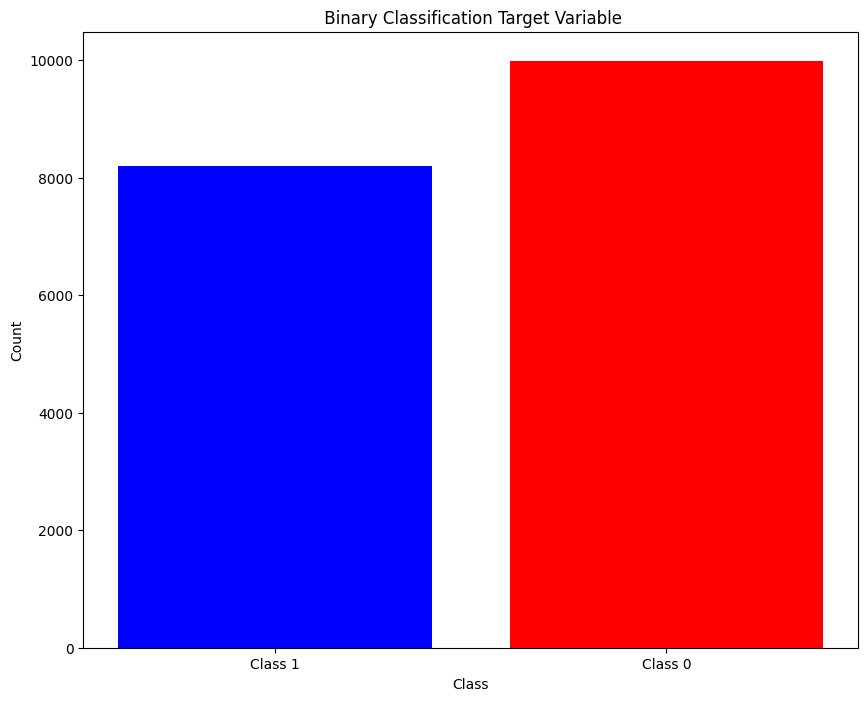

In [ ]:
# Create a bar plot (histogram) for the binary classification target variable
class_counts = df['Class'].value_counts()
plt.figure(figsize=(10, 8))
plt.bar(class_counts.index, class_counts.values, color=['red', 'blue'])
plt.xlabel('Class')
plt.ylabel('Count')

plt.title(' Binary Classification Target Variable')
plt.xticks(class_counts.index, ['Class 0', 'Class 1'])
plt.show()

In [ ]:
df.columns

Index(['id', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'EquivDiameter', 'Extent', 'Perimeter', 'Roundness',
       'AspectRation', 'Class'],
      dtype='object')

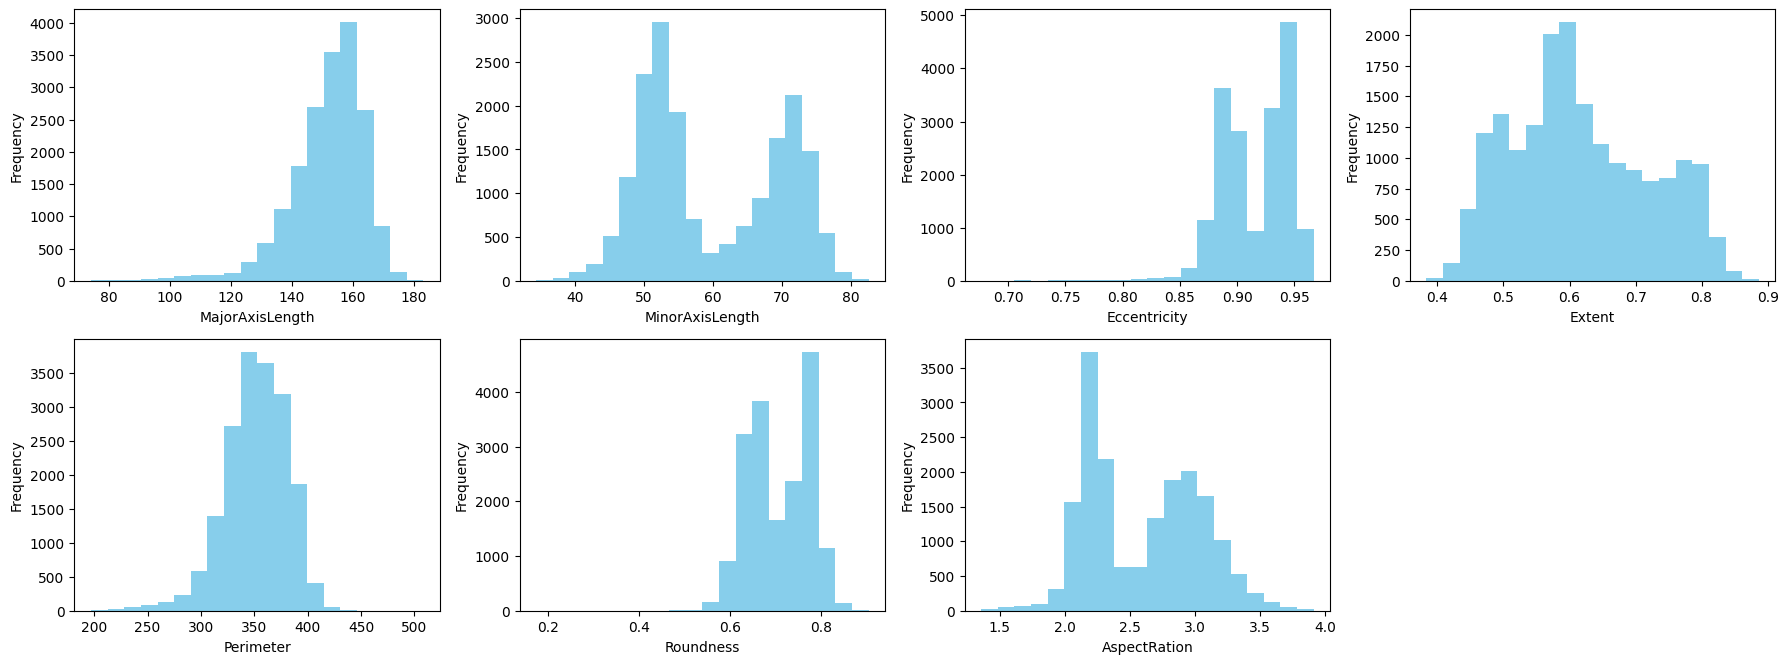

In [ ]:

dv_cols = list(dv[dv].index)

plt.figure(figsize=(18, 36))
index = 1

for col in dv_cols:
    plt.subplot(11, 4, index)
    plt.hist(df1[col], bins=20, color='skyblue')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    index += 1

plt.tight_layout()
plt.show()

visual representation of distribution of Data in numeric columns

# **HeatMap**

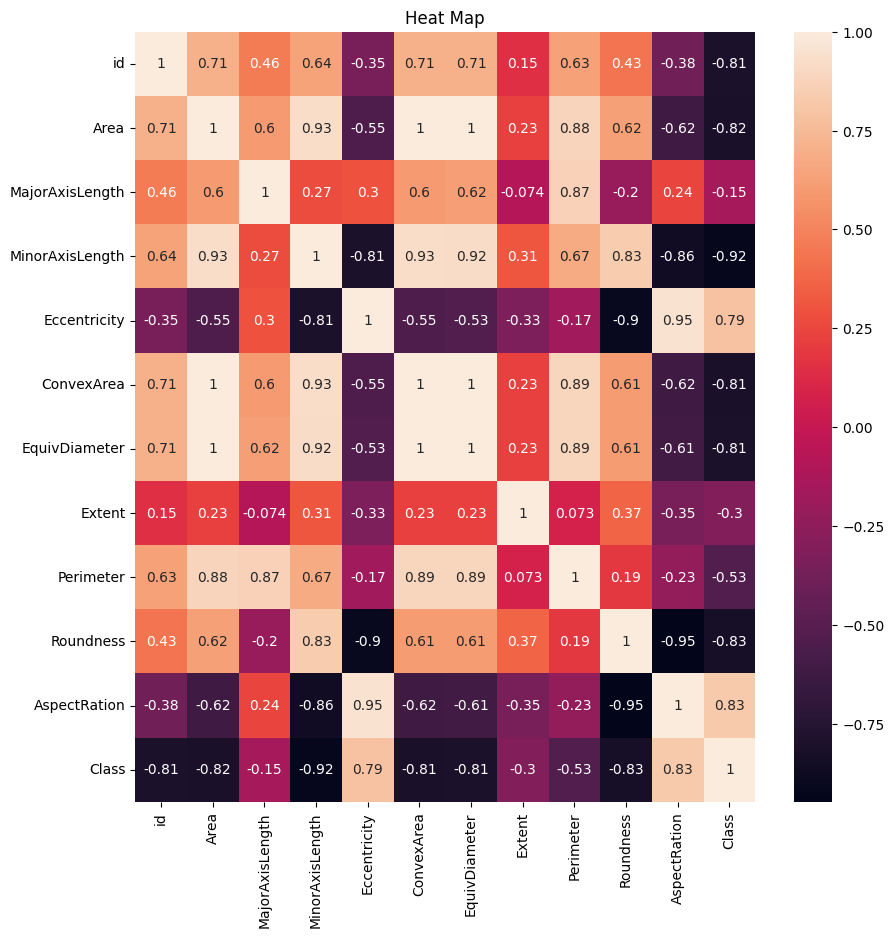

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.title("Heat Map")
plt.show()

Area , ConvexArea , Equidiameter are highly correlated

# **Dropping Columns**

In [ ]:
df.drop(columns=['id', 'ConvexArea', 'EquivDiameter'], inplace=True)

Dropping Unneccesary Columns from the dataset

In [ ]:
df.columns


Index(['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Extent',
       'Perimeter', 'Roundness', 'AspectRation', 'Class'],
      dtype='object')

# **Checking Outliers**

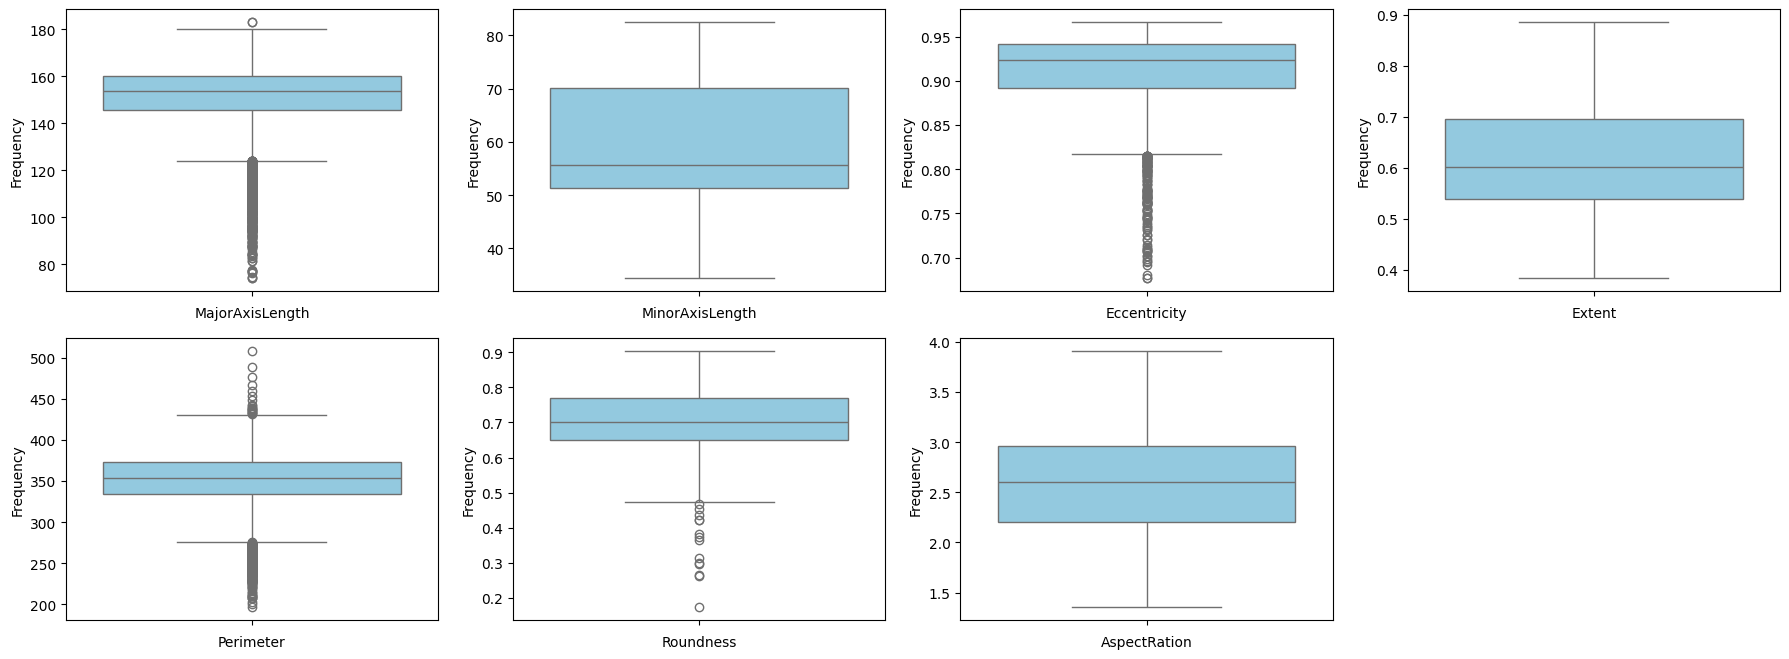

In [ ]:
dv= (df.dtypes == 'float64')
dv_cols = list(dv[dv].index)

plt.figure(figsize=(18, 36))
index = 1

for col in dv_cols:
    plt.subplot(11, 4, index)
    sns.boxplot(df1[col], color='skyblue')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    index += 1

plt.tight_layout()
plt.show()

MajorAxisLength , Eccentricity , Perimeter have more Outliers

In [ ]:

# outliers count
def count_outliers_IQR(df, columns):

  outlier_counts = {}
  for col in columns:
    # Calculate outlier boundaries
    Q1 = np.percentile(df[col], 25, interpolation='midpoint')
    Q3 = np.percentile(df[col], 75, interpolation='midpoint')
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outlier data points
    outlier_indices = df[((df[col] < lower_bound) | (df[col] > upper_bound))].index

    # Count outliers
    outlier_counts[col] = len(outlier_indices)

  return outlier_counts

# Example usage
df = df.copy()
numeric_columns = df.select_dtypes(include=['number']).columns
outlier_counts = count_outliers_IQR(df, numeric_columns)

# Print the number of outliers for each column
for col, count in outlier_counts.items():
  print(f"Column: {col}, Number of outliers: {count}")

Column: Area, Number of outliers: 0
Column: MajorAxisLength, Number of outliers: 538
Column: MinorAxisLength, Number of outliers: 0
Column: Eccentricity, Number of outliers: 136
Column: Extent, Number of outliers: 0
Column: Perimeter, Number of outliers: 315
Column: Roundness, Number of outliers: 14
Column: AspectRation, Number of outliers: 0
Column: Class, Number of outliers: 0


<ipython-input-19-79927850cc5e>:23: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  outlier_counts = count_outliers_IQR(df, numeric_columns)


# **Dropping** **Outliers**

In [ ]:
cols=["MajorAxisLength", "Eccentricity","Perimeter","Roundness"]
def drop_outliers(df,fieldname):
  for i in fieldname:
    iqr=1.5*(np.percentile(df[i],75))-(np.percentile(df[i],25))
    df.drop(df[df[i]>(iqr+np.percentile(df[i],75))].index,inplace=True)
    df.drop(df[df[i]<(iqr+np.percentile(df[i],25)-iqr)].index,inplace=True)
drop_outliers(df,cols)





In [ ]:
def count_outliers_IQR(df, columns):

  outlier_counts = {}
  for col in columns:
    # Calculate outlier boundaries
    Q1 = np.percentile(df[col], 25, interpolation='midpoint')
    Q3 = np.percentile(df[col], 75, interpolation='midpoint')
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outlier data points
    outlier_indices = df[((df[col] < lower_bound) | (df[col] > upper_bound))].index

    # Count outliers
    outlier_counts[col] = len(outlier_indices)

  return outlier_counts

# Example usage
df = df.copy()
numeric_columns = df.select_dtypes(include=['number']).columns
outlier_counts = count_outliers_IQR(df, numeric_columns)

# Print the number of outliers for each column
for col, count in outlier_counts.items():
  print(f"Column: {col}, Number of outliers: {count}")

Column: Area, Number of outliers: 0
Column: MajorAxisLength, Number of outliers: 18
Column: MinorAxisLength, Number of outliers: 0
Column: Eccentricity, Number of outliers: 0
Column: Extent, Number of outliers: 0
Column: Perimeter, Number of outliers: 5
Column: Roundness, Number of outliers: 0
Column: AspectRation, Number of outliers: 0
Column: Class, Number of outliers: 0


<ipython-input-22-79927850cc5e>:23: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  outlier_counts = count_outliers_IQR(df, numeric_columns)


# **After Removing Outliers**

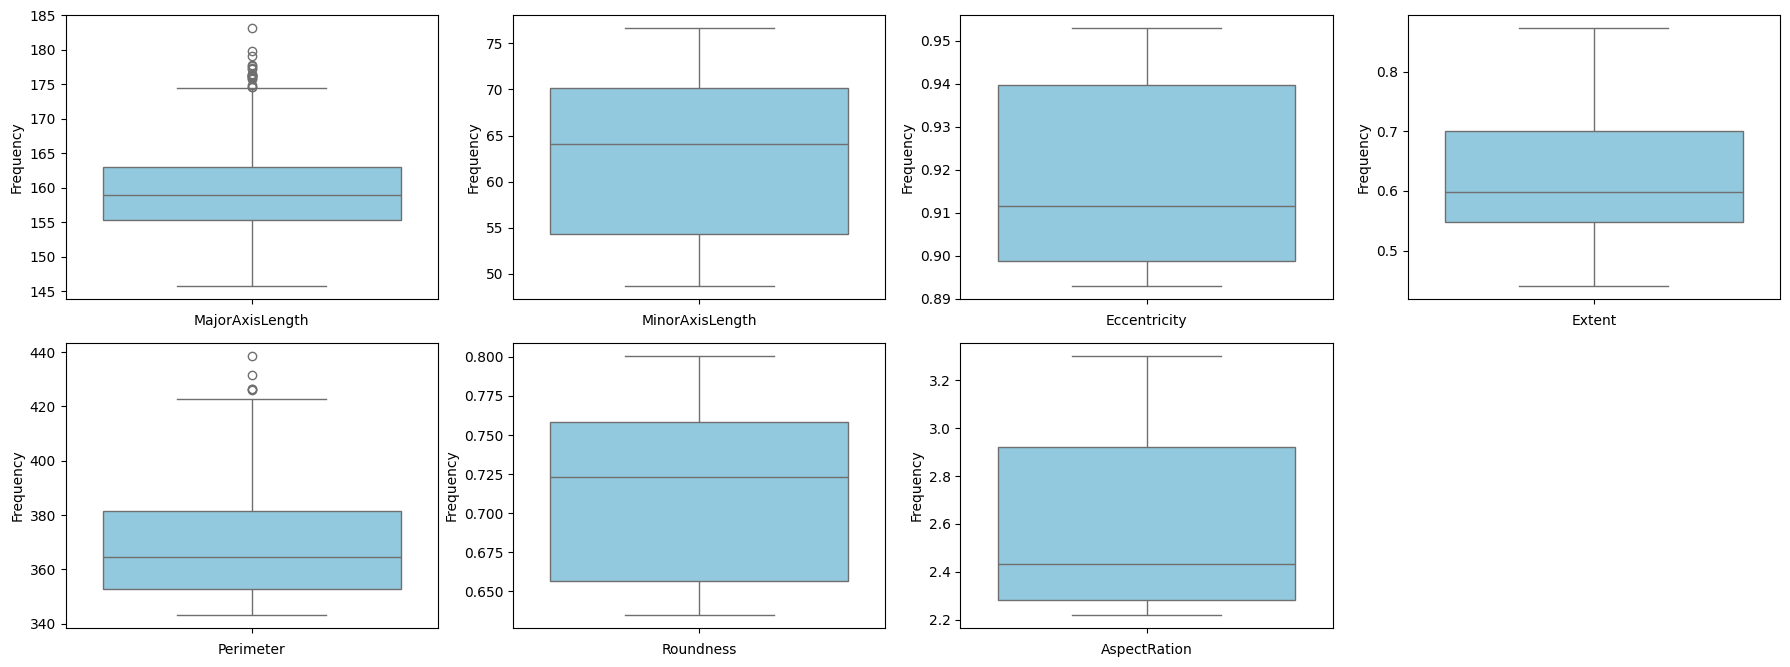

In [ ]:
dv= (df.dtypes == 'float64')
dv_cols = list(dv[dv].index)

plt.figure(figsize=(18, 36))
index = 1

for col in dv_cols:
    plt.subplot(11, 4, index)
    sns.boxplot(df[col],  color='skyblue')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    index += 1

plt.tight_layout()
plt.show()

# **Multivariate Analysis**

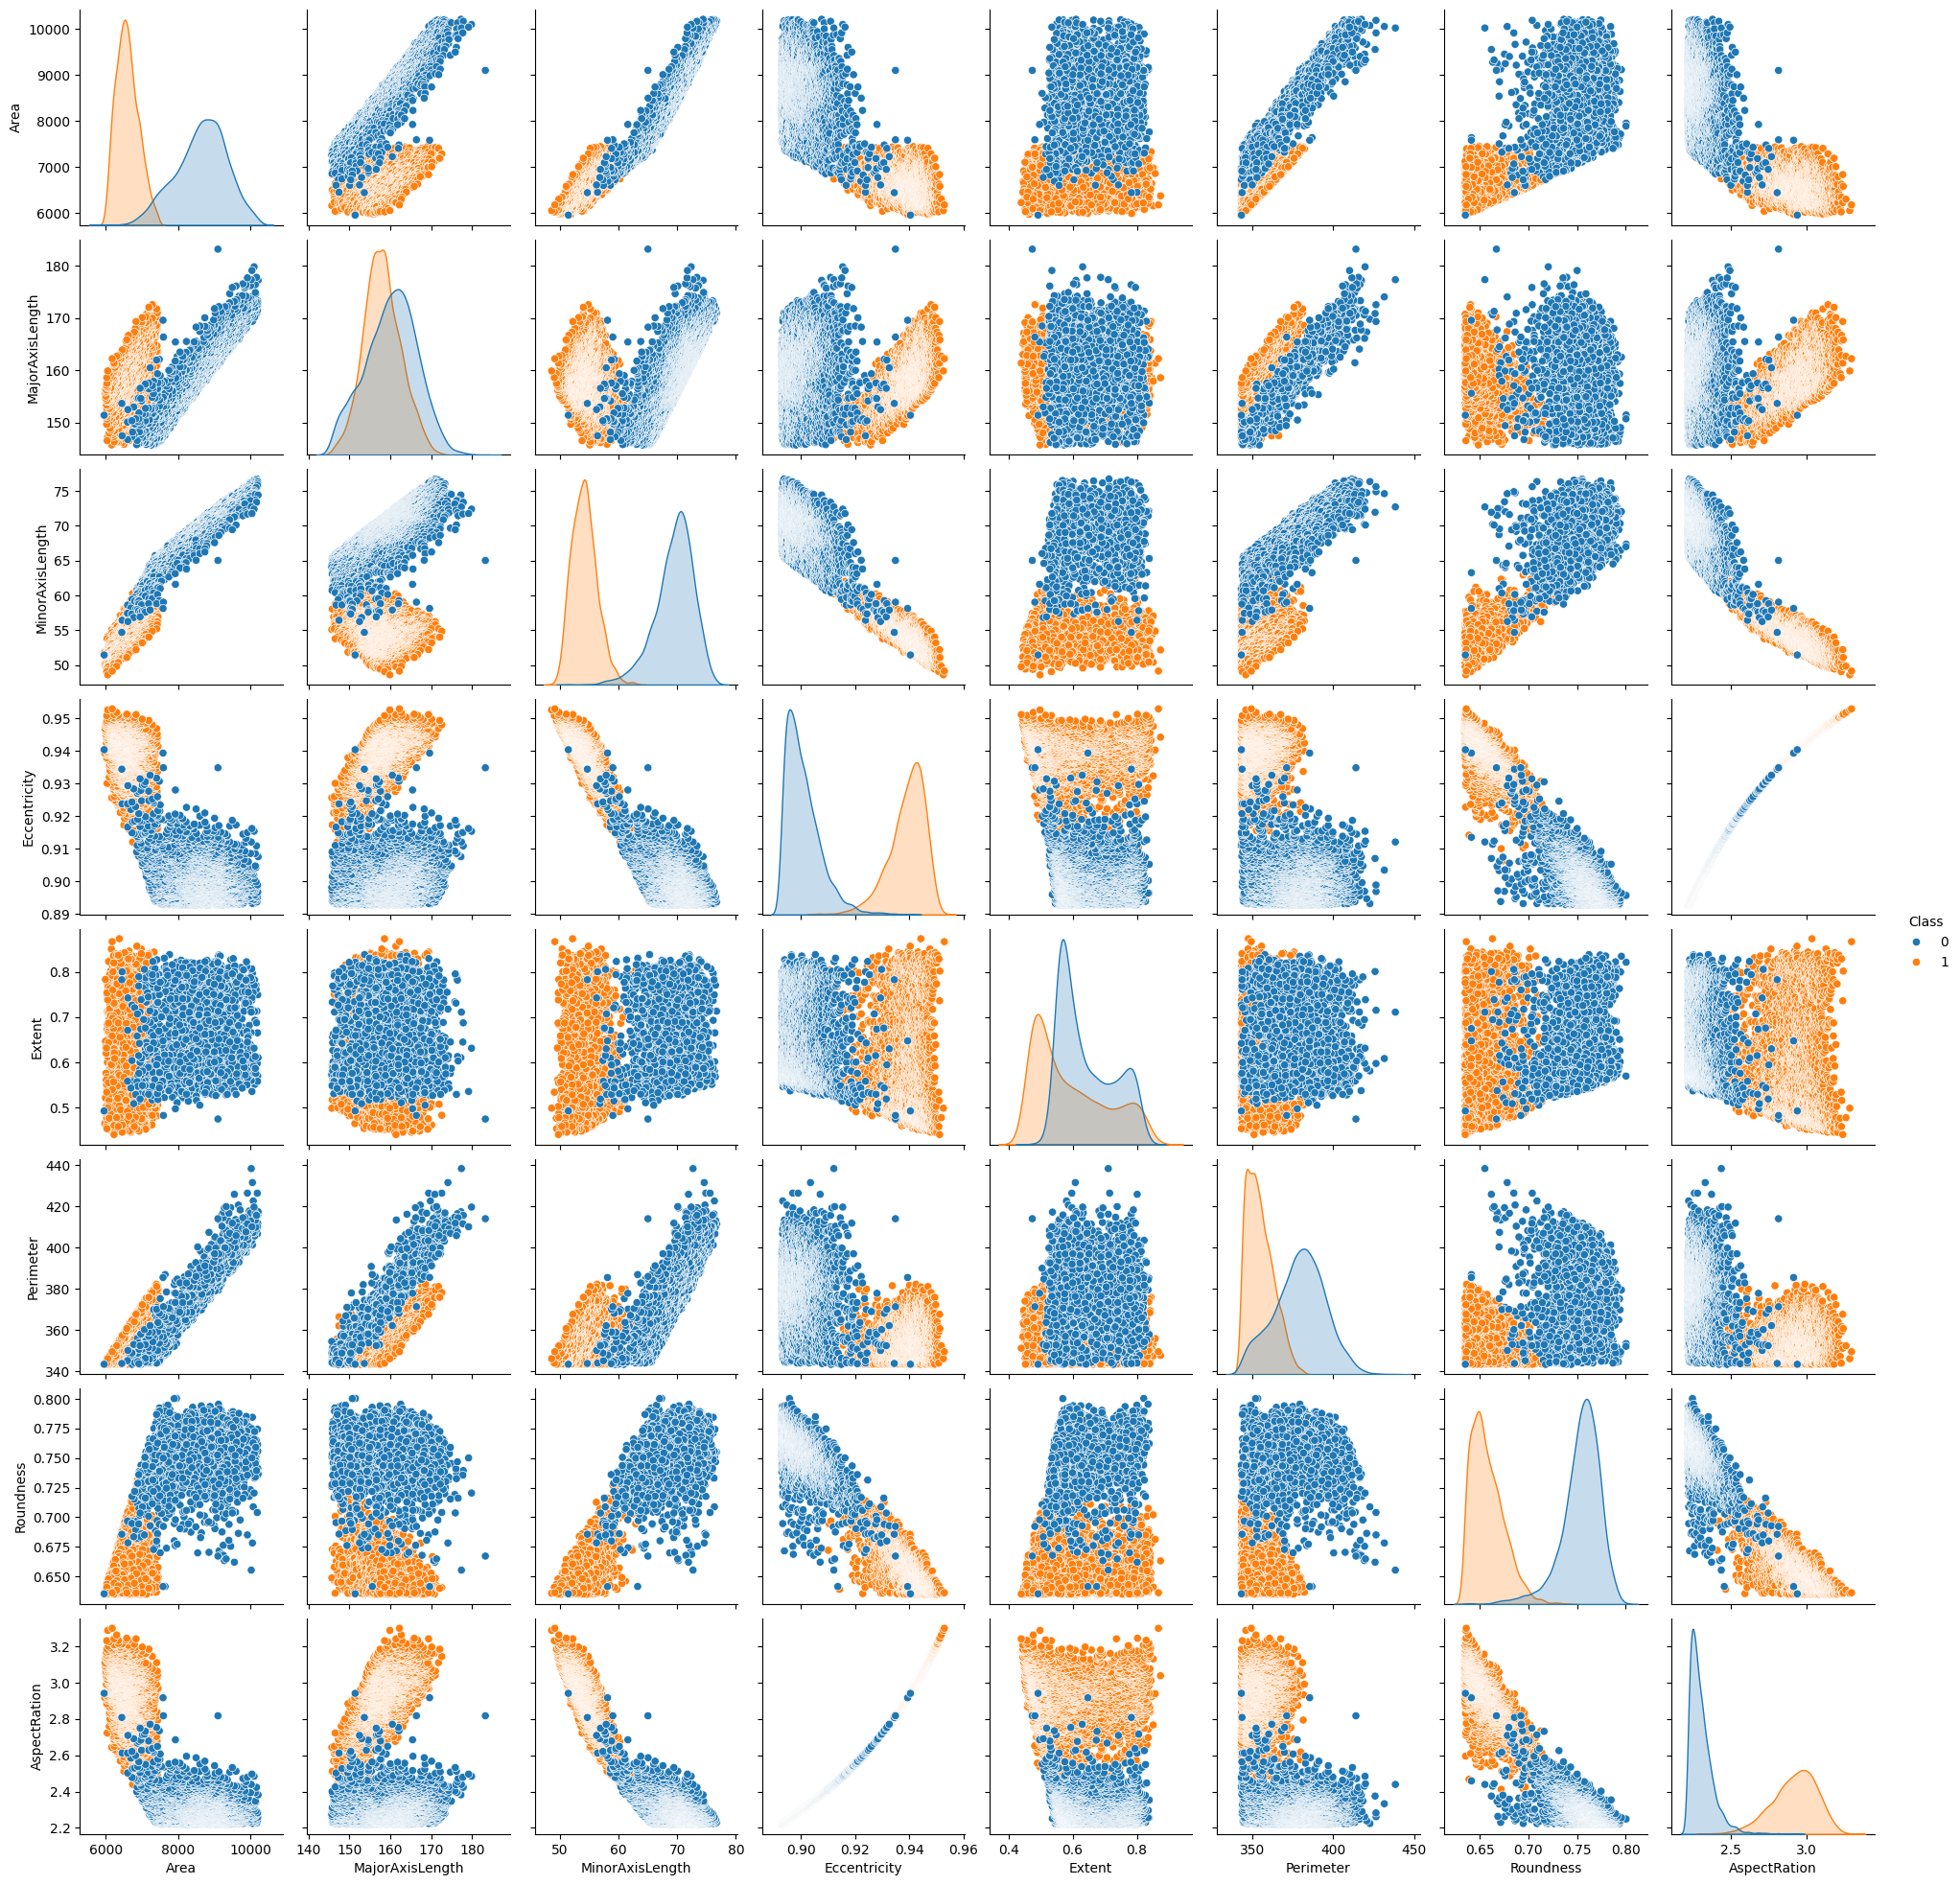

In [ ]:
sns.pairplot(df, hue='Class')
plt.show()

# **Data Splitting**

In [ ]:
X = df.drop('Class', axis=1)
y = df['Class']

In [ ]:
y.value_counts()

0    3083
1    2671
Name: Class, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

Training size :75%
Test size : 25%

# **Feature Scaling**

In [ ]:
# Standard Scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Model** **Building**

# **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

LogRegClassifier = LogisticRegression(max_iter=500)
LogRegClassifier.fit(X_train, y_train)

y_train_pred_logreg = LogRegClassifier.predict(X_train)
y_test_pred_logreg = LogRegClassifier.predict(X_test)


train_accuracy_logreg = accuracy_score(y_train_pred_logreg, y_train)
train_f1_score_logreg = f1_score(y_train, y_train_pred_logreg, average='weighted')
test_accuracy_logreg = accuracy_score(y_test_pred_logreg, y_test)
test_f1_score_logreg = f1_score(y_test, y_test_pred_logreg, average='weighted')


print('Training Accuracy (Logistic Regression): {:.2f}%'.format(train_accuracy_logreg * 100))
print('Testing Accuracy (Logistic Regression): {:.2f}%'.format(test_accuracy_logreg * 100))
print('Training F1 Score (Logistic Regression): {:.2f}'.format(train_f1_score_logreg*100))
print('Testing F1 Score (Logistic Regression): {:.2f}'.format(test_f1_score_logreg*100))


print("\nConfusion Matrix (Testing Set):")
print(confusion_matrix(y_test, y_test_pred_logreg))

Training Accuracy (Logistic Regression): 99.14%
Testing Accuracy (Logistic Regression): 98.89%
Training F1 Score (Logistic Regression): 99.14
Testing F1 Score (Logistic Regression): 98.89

Confusion Matrix (Testing Set):
[[750  10]
 [  6 673]]


# **Decision** **Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()

dt_model.fit(X_train, y_train)

train_pred=dt_model.predict(X_train)
y_pred = dt_model.predict(X_test)
train_accuracy_dt=accuracy_score(train_pred,y_train)
test_accuracy_dt=accuracy_score(y_pred,y_test)


print(confusion_matrix(y_test,y_pred))
print('training accuracy',accuracy_score(y_train,train_pred))
print('testing accuracy',accuracy_score(y_test,y_pred))
print('training precion',precision_score(y_train,train_pred))
print('training precion',precision_score(y_test,y_pred))

[[748  12]
 [  9 670]]
training accuracy 1.0
testing accuracy 0.985406532314107
training precion 1.0
training precion 0.9824046920821115


# **KNN (K_Nearest Neighbours)**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=3)

# Train the model on the training set
knn_model.fit(X_train, y_train)

# Make predictions on the testing set
tr_pred = knn_model.predict(X_test)
trg_pred=knn_model.predict(X_train)
train_accuracy_knn=accuracy_score(trg_pred,y_train)
test_accuracy_knn=accuracy_score(tr_pred,y_test)

print(confusion_matrix(y_test,tr_pred))
print('training accuracy',accuracy_score(y_train,trg_pred))
print('testing accuracy',accuracy_score(y_test,tr_pred))
print('training precion',precision_score(y_train,trg_pred))
print('training precion',precision_score(y_test,tr_pred))


[[747  13]
 [  4 675]]
training accuracy 0.991657010428737
testing accuracy 0.9881862404447533
training precion 0.9880239520958084
training precion 0.9811046511627907


# **Random Forest**

In [ ]:
RFclassifier = RandomForestClassifier(n_estimators=1000,max_leaf_nodes=21)
RFclassifier.fit(X_train, y_train)

y_test_pred_rf = RFclassifier.predict(X_test)
y_train_pred_rf=RFclassifier.predict(X_train)
train_accuracy_rf=accuracy_score(y_train_pred_rf,y_train)
test_accuracy_rf=accuracy_score(y_test_pred_rf,y_test)

print(confusion_matrix(y_test,y_test_pred_rf))
print('training accuracy',accuracy_score(y_train,y_train_pred_rf))
print('testing accuracy',accuracy_score(y_test,y_test_pred_rf))
print('training precion',precision_score(y_train,y_train_pred_rf))
print('training precion',precision_score(y_test,y_test_pred_rf))

[[749  11]
 [  5 674]]
training accuracy 0.9944380069524913
testing accuracy 0.9888811674774148
training precion 0.9915084915084915
training precion 0.983941605839416


In [ ]:
fscores = pd.Series(RFclassifier.feature_importances_, index=X_train.columns).sort_values(ascending=False)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

# **Confusion Matrix**

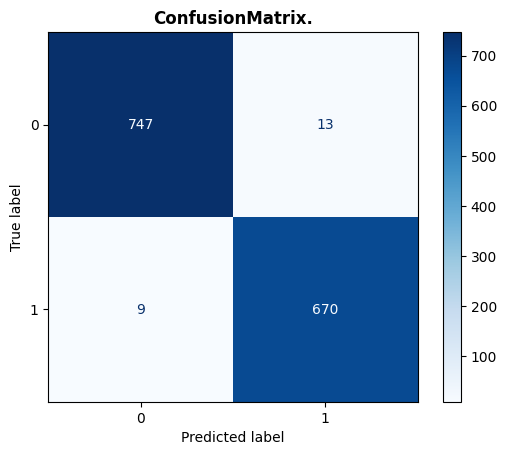

In [ ]:
cm_test = confusion_matrix(y_test, y_pred)
matrix = ConfusionMatrixDisplay(confusion_matrix = cm_test, display_labels = [0, 1])
matrix.plot(cmap="Blues")
plt.title("ConfusionMatrix.", weight="bold");

# **Classification Report**

In [ ]:
cr1=classification_report(y_test,y_pred)
print(cr1)

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       760
           1       0.98      0.99      0.98       679

    accuracy                           0.98      1439
   macro avg       0.98      0.98      0.98      1439
weighted avg       0.98      0.98      0.98      1439



# **ROC Curve**

Accuracy: 0.9847116052814454
Precision: 0.9809663250366032
Recall: 0.9867452135493373
F1-Score: 0.9838472834067548
ROC-AUC Score: 0.9995872412991242


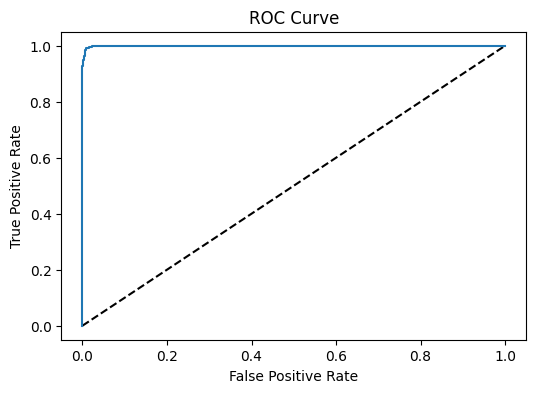

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, RFclassifier.predict_proba(X_test)[:, 1])


print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-Score:', f1)
print('ROC-AUC Score:', roc_auc)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test,RFclassifier.predict_proba(X_test)[:, 1])
fig = plt.figure(figsize=(6, 4))
plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal 50% line
plt.plot(fpr, tpr)  # Plot the FPR and TPR achieved by the model
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# **Naive Bayes**

In [ ]:
# naive bayes code
from sklearn.naive_bayes import GaussianNB
Naiveclassifier=GaussianNB()
Naiveclassifier.fit(X_train,y_train)

y_train_pred_Naive=Naiveclassifier.predict(X_train)
y_test_pred_Naive=Naiveclassifier.predict(X_test)

train_accuracy_Naive=accuracy_score(y_train_pred_Naive,y_train)
test_accuracy_Naive=accuracy_score(y_test_pred_Naive,y_test)

print('Training accuracy(Naive Bayes): {:.2f}%'.format(train_accuracy_Naive*100))
print('Testing accuracy(Naive Bayes): {:.2f}%'.format(test_accuracy_Naive*100))

print("\nConfusion Matrix (Testing Set):")
print(confusion_matrix(y_test, y_test_pred_Naive))

Training accuracy(Naive Bayes): 99.00%
Testing accuracy(Naive Bayes): 99.03%

Confusion Matrix (Testing Set):
[[749  11]
 [  3 676]]


 **Accuracy Scores**

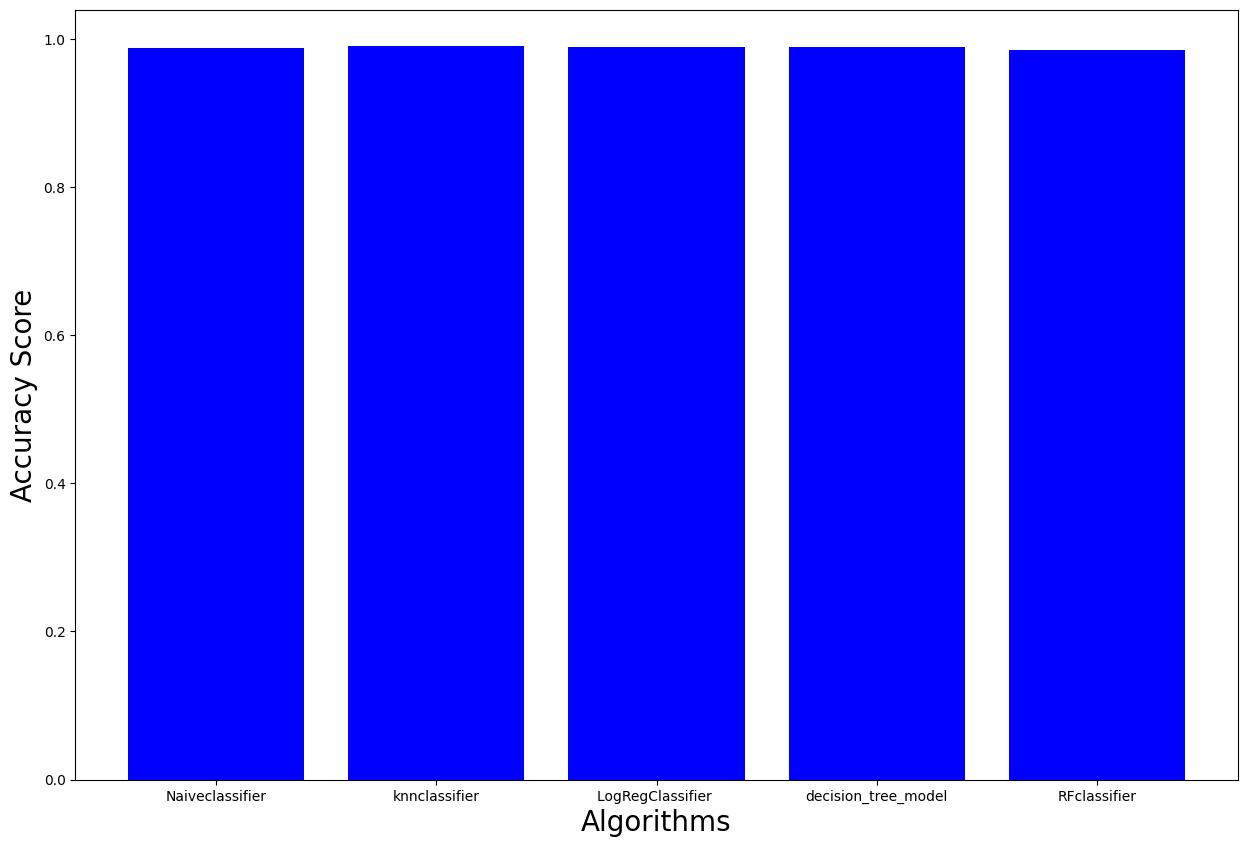

In [ ]:
plt.figure(figsize=(15, 10))
plt.bar(x=['Naiveclassifier','knnclassifier','LogRegClassifier ','decision_tree_model','RFclassifier'],height=[test_accuracy_knn,test_accuracy_Naive,test_accuracy_rf,test_accuracy_logreg,test_accuracy_dt],color='blue')
plt.xlabel('Algorithms',fontsize=20)
plt.ylabel('Accuracy Score',fontsize=20)
plt.show()

# **Conclusiom**

Model is trained well and Almost every algorithm is giving good Accuracy scores